In [53]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc
import math

Name: Ndiame Ndiaye

Student ID: 260744987

Question 1:

If $x$ and $y$ are both negative then $f_a^{(k)}(x)=f_a^{(k)}(y)=0\Longrightarrow\frac{|f_a^{(k)}(x)-f_a^{(k)}(y)|}{|x-y|^\alpha}=0$ so we just need to work on $x>0$ and $y\geq 0$ or  $\lim_{y\rightarrow 0, x<0}y$ Since $f(0)=\lim_{y\rightarrow 0} f(y)=0$, we can assume that we are working with $x>y\geq 0$ on the function $f(x)=x^a$

If we take $k\geq a$ then $\lim_{x\rightarrow 0,x>0} f_a^{(k)}(x)=\infty$ so we can't expect the function to be in $C^{k,\alpha}$ since it diverges at 0.

Take $k=\lfloor a\rfloor$ if $a\notin \mathbb{N}$ and $k=a-1$ otherwise and take $\alpha=a-k$. Then $|f_a^{(k)}(x)-f_a^{(k)}(y)|$ is $c*|x^\alpha-y^\alpha|$ with $c=\prod_{i=0}^{k-1} (a-i)$. 

Since $\alpha\leq 1$ we know that the maximum value of the sum is attained when $k$ is maximal so if we find the maximal $\alpha$ such that $f_a\in C^{k,\alpha}$ with k as defined before then we know that we have the maximum value.

On the other hand, $\frac{|fa^{(k)}(x)-f_a^{(k)}(y)|}{|x-y|^\gamma}=\frac{|f_a^{(k)}(x)-f_a^{(k)}(y)|}{|x-y|^\gamma}=c*\frac{|x^\alpha-y^\alpha|}{|x-y|^\beta}$. If $\beta<\alpha$ then fixing x and taking the limit when y tends to x we get a limit of 0 using the degree of the powers of x however if $\beta>\alpha$ it tends to $\infty$. Finally, when $\beta=\alpha$, this will tend to a constant when we make y tend to x. So it doesn't tend to $\infty$.

 We can conclude that the largest $k+\beta$ such that $f_\alpha\in C^{k,\beta}$ is $k+\beta=\alpha$.

Question 2:

The error is clearly maximal when x>0 since before x=0, no matter what n you take, both $f_\alpha(x)$ and $f(\frac{x_i+x_{i+1}}{2})=0$

In [22]:
#Approximating with the midpoint rule:
def midpointRuleError(n,k,alpha):
    endPoints=[-1+2*i/n for i in range(n+1)]
    xList=np.linspace(-1, 1, k)
    error=0
    l=0
    current=0
    for i in range(n):
        x0=(endPoints[i]+endPoints[i+1])/2
        approximate=0
        if x0>0:
            approximate=np.power(x0,alpha)
        while current<np.floor((i+1)*(k/n)):
            x=xList[current]
            if (x>0):
                y=np.absolute(approximate-np.power(x,alpha))
                if(y>error):
                    error=y
            current=current+1
    return error

In [23]:
k=1000000
print("for alpha=1 and n=15 the error is approximately ",midpointRuleError(10,k,1))
print("for alpha=1 and n=20 the error is approximately ",midpointRuleError(15,k,1))
print("for alpha=2 and n=10 the error is approximately ",midpointRuleError(10,k,2))
print("for alpha=2 and n=15 the error is approximately ",midpointRuleError(15,k,2))
print("for alpha=2 and n=20 the error is approximately ",midpointRuleError(20,k,2))

for alpha=1 and n=15 the error is approximately  0.1
for alpha=1 and n=20 the error is approximately  0.0666666666667
for alpha=2 and n=10 the error is approximately  0.19
for alpha=2 and n=15 the error is approximately  0.128888888889
for alpha=2 and n=20 the error is approximately  0.0975


In [155]:
def exactVSApproximationMidpoint(n,alpha,k):
    nList1=[-1+2*i/(n-1) for i in range(n)]
    nList=[]
    approximate=[]
    for x in range(n):
        if (x==0):
            nList.append(-1)
            approximate.append(0)
        elif (x==n-1):
            nList.append(1)
            approximate.append(np.power((1+nList1[x-1])/2,alpha))
        else:
            x1=(nList1[x]+nList1[x-1])/2
            x2=(nList1[x]+nList1[x+1])/2
            nList.append(nList1[x])
            nList.append(nList1[x])
            if(x2<0):
                approximate.append(0)
                approximate.append(0)
            elif (x1<0):
                approximate.append(0)
                approximate.append(np.power(x2,alpha))
            else:
                approximate.append(np.power(x1,alpha))
                approximate.append(np.power(x2,alpha))
    xList=np.linspace(-1, 1, n*k)
    exact=[]
    for x in xList:
        if (x<0):
            exact.append(0)
        else:
            exact.append(np.power(x,alpha))
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    ax1.plot(xList,exact,label='Exact value')
    ax1.plot(nList,approximate,label='Approximate value')
    ax1.legend(loc="upper center")
    plt.show()

for n=15, alpha=1.000000 we get 


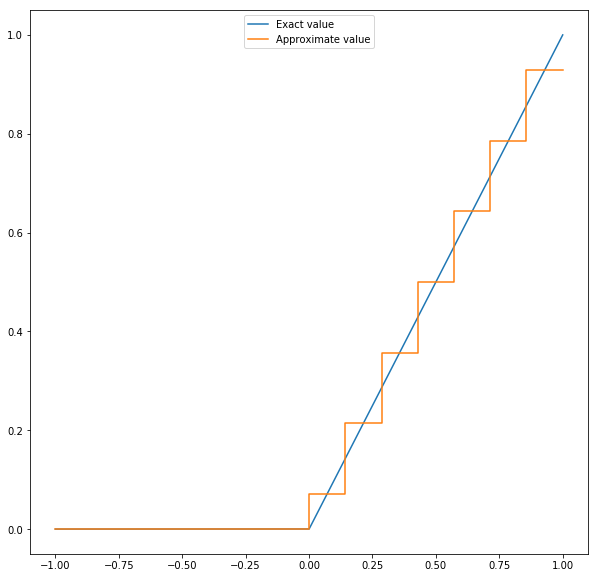

In [165]:
k=10000
n=15
alpha=1
print("for n=%d, alpha=%f we get "%(n,alpha))
exactVSApproximationMidpoint(n,alpha,k)

for n=15, alpha=0.200000 we get 


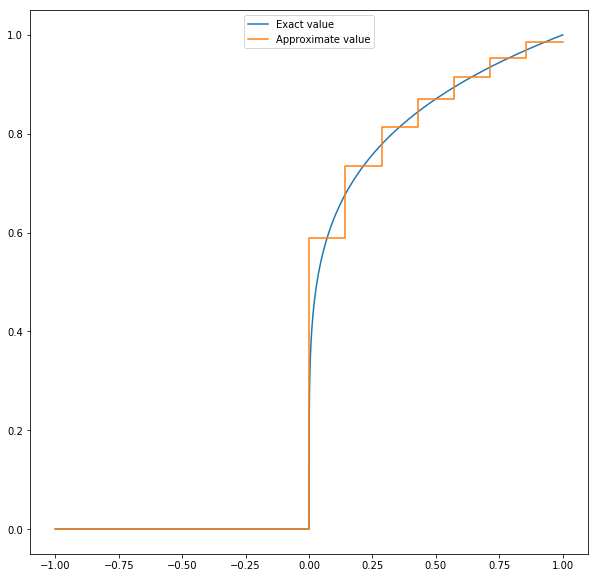

In [166]:
k=10000
n=15
alpha=0.2
print("for n=%d, alpha=%f we get "%(n,alpha))
exactVSApproximationMidpoint(n,alpha,k)

for n=15, alpha=5.000000 we get 


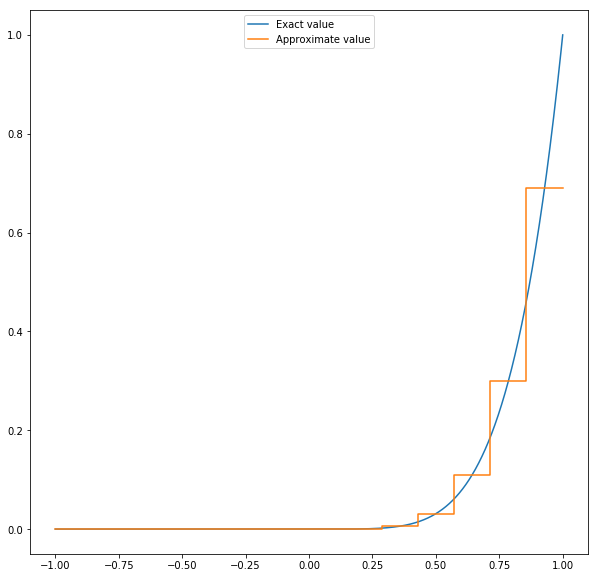

In [167]:
k=10000
n=15
alpha=5
print("for n=%d, alpha=%f we get "%(n,alpha))
exactVSApproximationMidpoint(n,alpha,k)

for n=5, alpha=1.000000 we get 


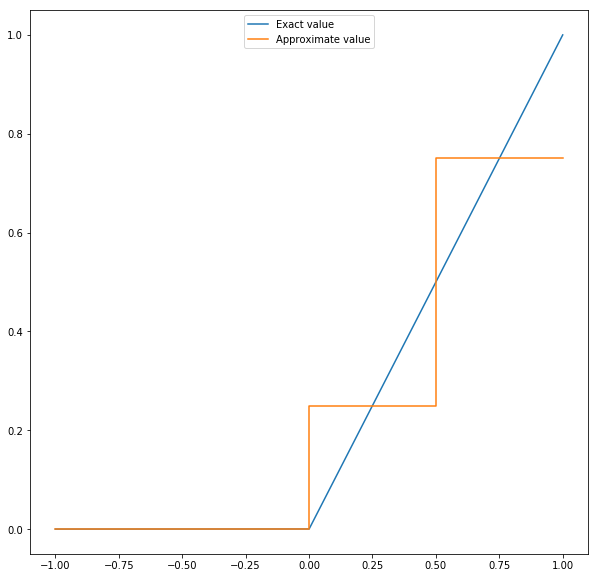

In [159]:
k=10000
n=5
alpha=1
print("for n=%d, alpha=%f we get "%(n,alpha))
exactVSApproximationMidpoint(n,alpha,k)

for n=30, alpha=1.000000 we get 


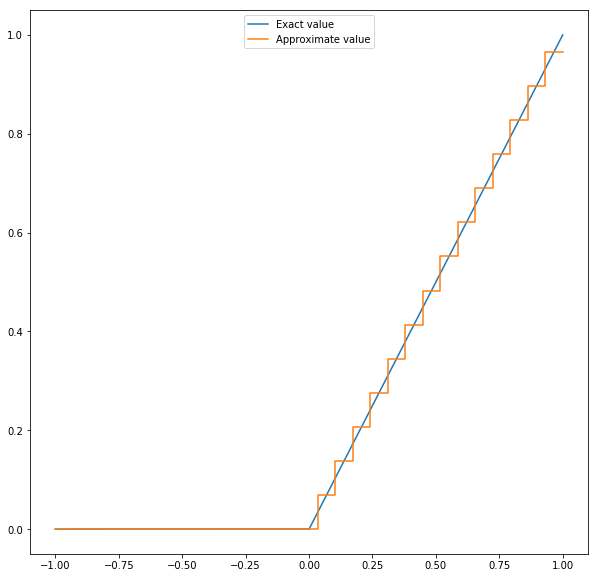

In [160]:
k=10000
n=30
alpha=1
print("for n=%d, alpha=%f we get "%(n,alpha))
exactVSApproximationMidpoint(n,alpha,k)

In [ ]:
k=20000
xList=range(2,500)
yList1=[midpointRuleError(n,k,0.5) for n in range(2,500)]
yList2=[midpointRuleError(n,k,1) for n in range(2,500)]
yList3=[midpointRuleError(n,k,1.5) for n in range(2,500)]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.plot(xList,yList1,label='Error estimate for alpha=0.5')
ax1.plot(xList,yList2,label='Error estimate for alpha=1')
ax1.plot(xList,yList3,label='Error estimate for alpha=1.5')
ax1.legend(loc="upper center")
plt.show()

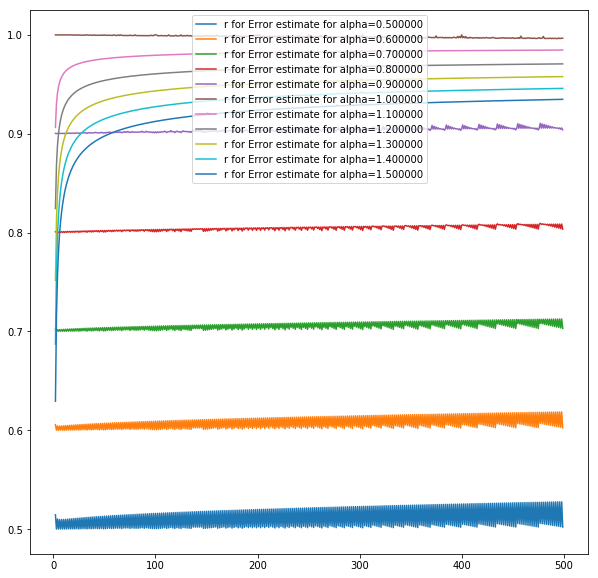

In [189]:
k=20000
xList=range(2,500)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
for i in range(11):
    alpha=0.5+i/10
    yList=[np.log(midpointRuleError(n,k,alpha))/np.log(1/n) for n in range(2,500)]
    ax1.plot(xList,yList,label='r for Error estimate for alpha=%f'%alpha)
ax1.legend(loc="upper center")
plt.show()

The value of r converges when the function is regular but when it's not regular ($a<1$) it will oscilate instead of converge to a single point. Judging from the curves we have, it seems that $r(a)\approx a$ when $a<1$ and  when a is larger than 1 it becomes a power of a. This means that the estimate using this method is much better when we are at 1 or at a value which is greater than 1 than at a value between 0 and 1 since it converges faster when r is larger. The convergence is at best linear

Question 3:

We start by writing a method which returns a list of the images  of the nodes and we will be used again for questions 4 and 5.

In [24]:
def nodeList(n,alpha):
    xList=[-1+2*i/n for i in range(n+1)]
    list=[]
    for x in xList:
        if (x<0):
            list.append(0)
        else:
            list.append(np.power(x,alpha))
    return list

Starting here, we will work specifically with the approximation with piecewise linear functions

In [163]:
def exactVSApproximationPWC(n,alpha,k):
    nList=[-1+2*i/n for i in range(n+1)]
    approximate=nodeList(n,alpha)
    xList=np.linspace(-1, 1, k)
    exact=[]
    for x in xList:
        if (x<0):
            exact.append(0)
        else:
            exact.append(np.power(x,alpha))
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    ax1.plot(xList,exact,label='Exact value')
    ax1.plot(nList,approximate,label='Approximate value')
    ax1.legend(loc="upper center")
    plt.show()

In [118]:
#Approximating with pointwise continuous functions:
def pointwiseContinuousError(n,k,alpha):
    endPoints=[-1+2*i/n for i in range(n+1)]
    nodes=nodeList(n,alpha)
    xList=np.linspace(-1, 1, k)
    error=0
    l=0
    current=0
    for i in range(n):
        smaller=nodes[i]
        larger=nodes[i+1]
        slope=(larger-smaller)*n/2
        while current < np.floor((i+1)*k/n):
            x=xList[current]
            approximate=smaller+slope*(x-endPoints[i])
            if (x>0):
                y=np.absolute(approximate-np.power(x,alpha))
                if(y>error):
                    error=y
            current=current+1
    return error

In [109]:
k=100000
print("for alpha=1 and n=15 the error is approximately ",pointwiseContinuousError(15,k,1))
print("for alpha=1 and n=20 the error is approximately ",pointwiseContinuousError(20,k,1))
print("for alpha=2 and n=10 the error is approximately ",pointwiseContinuousError(10,k,2))
print("for alpha=2 and n=15 the error is approximately ",pointwiseContinuousError(15,k,2))
print("for alpha=2 and n=20 the error is approximately ",pointwiseContinuousError(20,k,2))

for alpha=1 and n=15 the error is approximately  0.0333283332833
for alpha=1 and n=20 the error is approximately  1.38777878078e-16
for alpha=2 and n=10 the error is approximately  0.009999999999
for alpha=2 and n=15 the error is approximately  0.00444444444044
for alpha=2 and n=20 the error is approximately  0.00249999999975


for n=9 and alpha=1.000000 we get 


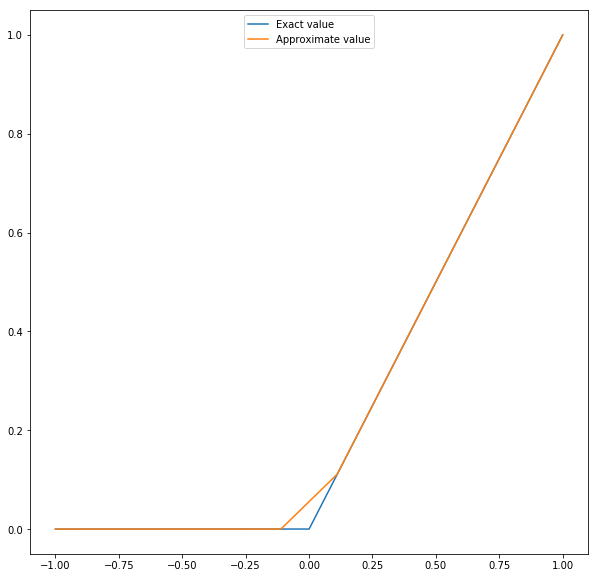

In [181]:
k=10000
n=9
alpha=1
print("for n=%d and alpha=%f we get "%(n,alpha))
exactVSApproximationPWC(n,alpha,k)

for n=9 and alpha=0.200000 we get 


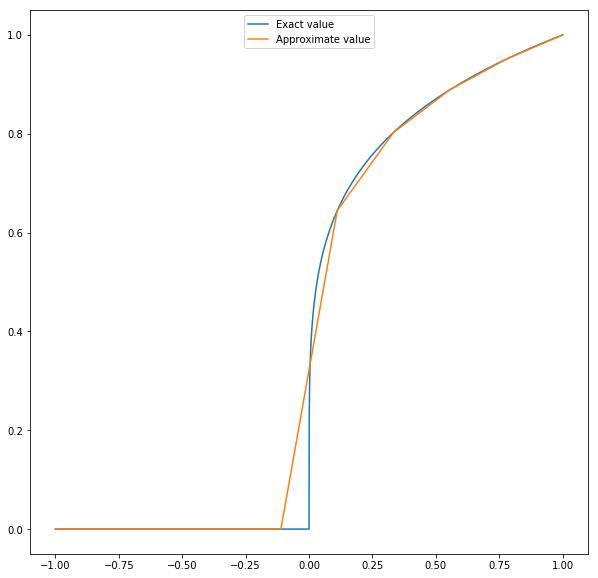

In [182]:
k=10000
n=9
alpha=0.2
print("for n=%d and alpha=%f we get "%(n,alpha))
exactVSApproximationPWC(n,alpha,k)

for n=9 and alpha=5.000000 we get 


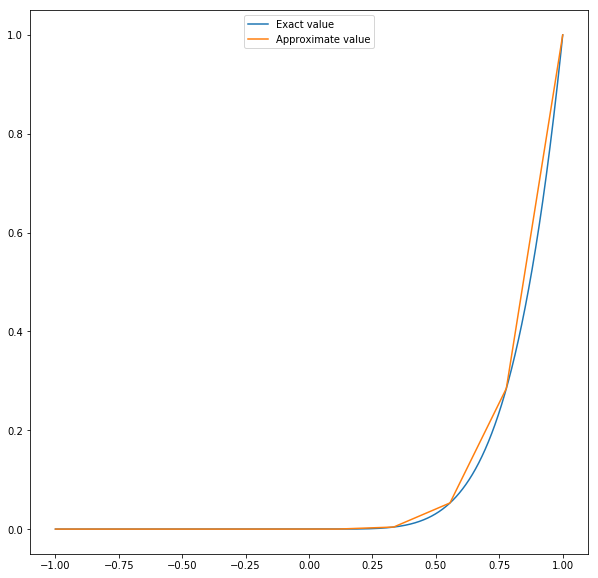

In [183]:
k=10000
n=9
alpha=5
print("for n=%d and alpha=%f we get "%(n,alpha))
exactVSApproximationPWC(n,alpha,k)

for n=3 and alpha=1.000000 we get 


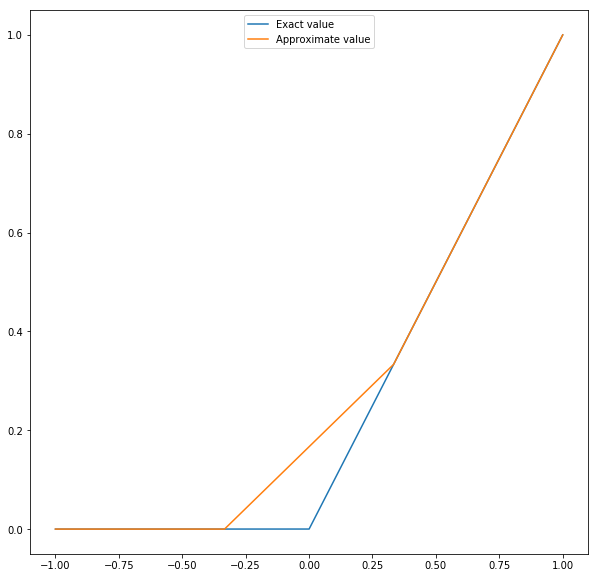

In [184]:
k=10000
n=3
alpha=1
print("for n=%d and alpha=%f we get "%(n,alpha))
exactVSApproximationPWC(n,alpha,k)

for n=15 and alpha=1.000000 we get 


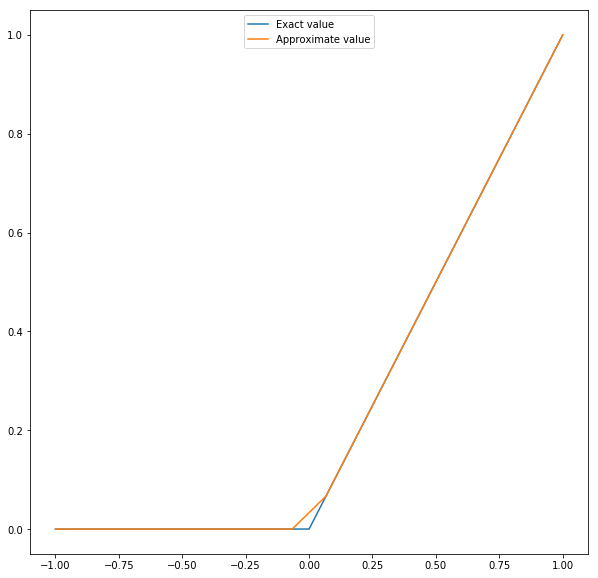

In [185]:
k=10000
n=15
alpha=1
print("for n=%d and alpha=%f we get "%(n,alpha))
exactVSApproximationPWC(n,alpha,k)

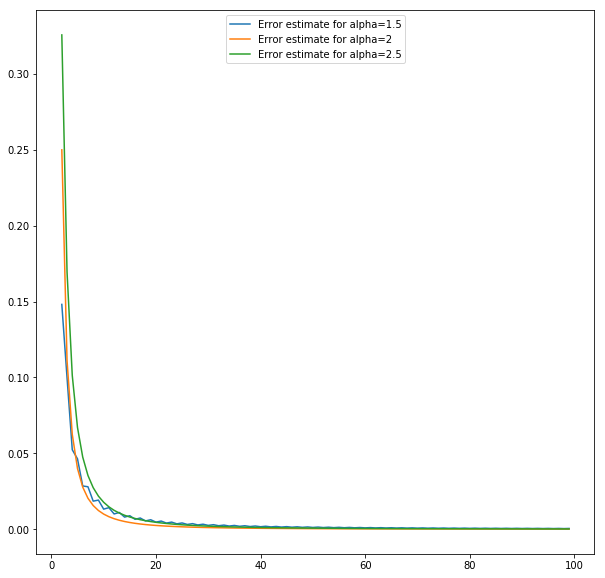

In [187]:
k=20000
xList=range(2,100)
yList1=[pointwiseContinuousError(n,k,1.5) for n in range(2,100)]
yList2=[pointwiseContinuousError(n,k,2) for n in range(2,100)]
yList3=[pointwiseContinuousError(n,k,2.5) for n in range(2,100)]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.plot(xList,yList1,label='Error estimate for alpha=1.5')
ax1.plot(xList,yList2,label='Error estimate for alpha=2')
ax1.plot(xList,yList3,label='Error estimate for alpha=2.5')
ax1.legend(loc="upper center")
plt.show()

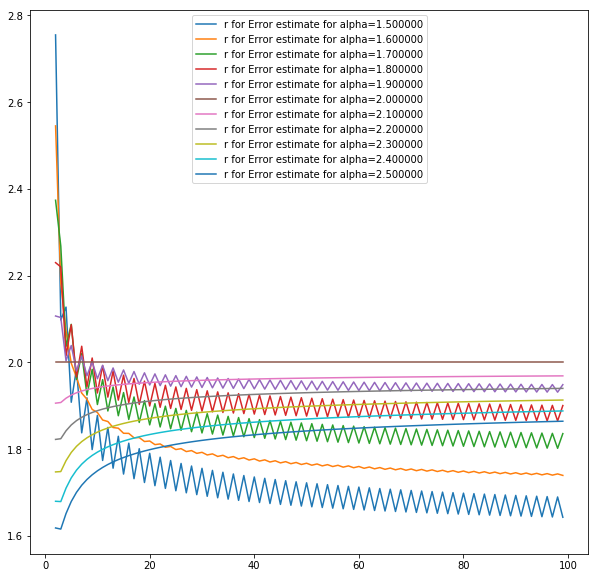

In [191]:
k=20000
xList=range(2,100)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
for i in range(11):
    alpha=1.5+i/10
    yList=[np.log(pointwiseContinuousError(n,k,alpha))/np.log(1/n) for n in range(2,100)]
    ax1.plot(xList,yList,label='r for Error estimate for alpha=%2f'%alpha)
ax1.legend(loc="upper center")
plt.show()

Here we see that the convergence to r is centered at $a=2$ and the value of r is generally greater so we get convergence to the correct value with respect to n much more quickly since we have quadratic convergence for a=2 and for values surrounding 2 we still have greater than 1. The convergence will be at best quadratic unlike the previous one which was at best linear.

Question 4:

In [129]:
def exactVSApproximationBern(n,alpha,k):
    xList=np.linspace(-1, 1, k)
    nodes=nodeList(n,alpha)
    approximate=[]
    exact=[]
    for x in xList:
        fun=0
        for i in range(n+1):
            phi=sc.comb(n,i)*np.power((x+1)/2,i)*np.power((1-x)/2,n-i)
            fun=fun+nodes[i]*phi
        approximate.append(fun)
        if (x<0):
            exact.append(0)
        else:
            exact.append(np.power(x,alpha))
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    ax1.plot(xList,exact,label='Exact value')
    ax1.plot(xList,approximate,label='Approximate value')
    plt.show()

In [122]:
#Approximating with pointwise continuous functions:
def bernContinuousError(n,k,alpha):
    endPoints=[-1+2*i/n for i in range(n+1)]
    nodes=nodeList(n,alpha)
    xList=np.linspace(-1, 1, k)
    error=0
    for x in xList:
        fun=0
        for i in range(n+1):
            phi=sc.comb(n,i)*np.power((x+1)/2,i)*np.power((1-x)/2,n-i)
            fun=fun+nodes[i]*phi
        temp=0
        if (x<0):
            temp=np.absolute(fun)
        else:
            temp=np.absolute(np.power(x,alpha)-fun)
        if(temp>error):
            error=temp
    return error

In [87]:
k=10000
print("for alpha=1 and n=15 the error is approximately ",bernContinuousError(10,k,1))
print("for alpha=1 and n=20 the error is approximately ",bernContinuousError(15,k,1))
print("for alpha=2 and n=10 the error is approximately ",bernContinuousError(10,k,2))
print("for alpha=2 and n=15 the error is approximately ",bernContinuousError(15,k,2))
print("for alpha=2 and n=20 the error is approximately ",bernContinuousError(20,k,2))

for alpha=1 and n=15 the error is approximately  0.123041875012
for alpha=1 and n=20 the error is approximately  0.104732994802
for alpha=2 and n=10 the error is approximately  0.0829550050727
for alpha=2 and n=15 the error is approximately  0.0574741222679
for alpha=2 and n=20 the error is approximately  0.0441450171923


for n=15, alpha=1.000000 we get 


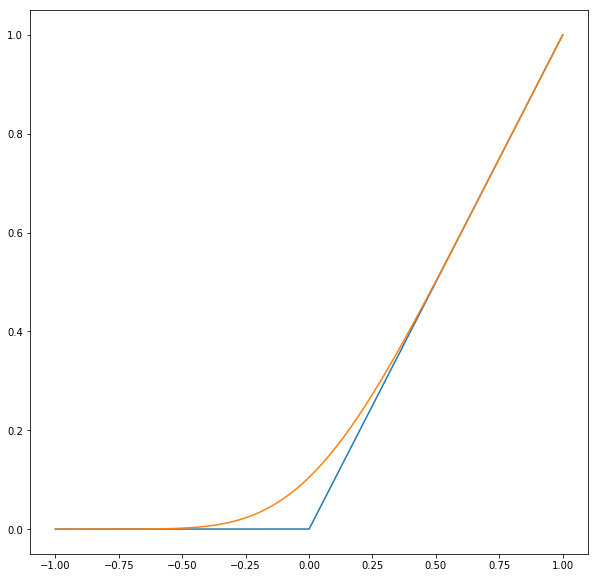

In [190]:
k=10000
n=15
alpha=1
print("for n=%d, alpha=%f we get "%(n,alpha))
exactVSApproximationBern(n,alpha,k)

for n=25, alpha=1.000000 we get 


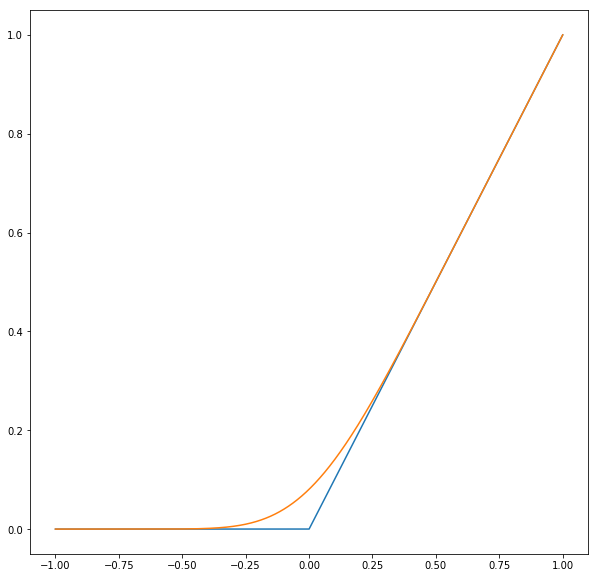

In [214]:
k=10000
n=25
alpha=1
print("for n=%d, alpha=%f we get "%(n,alpha))
exactVSApproximationBern(n,alpha,k)

for n=5, alpha=1.000000 we get 


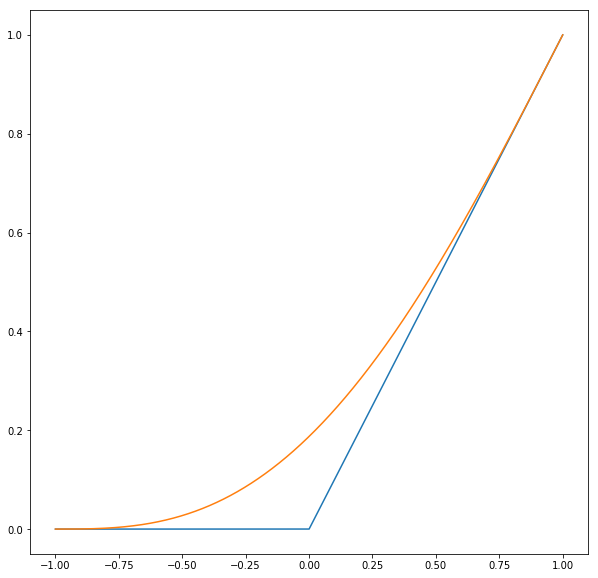

In [215]:
k=10000
n=5
alpha=1
print("for n=%d, alpha=%f we get "%(n,alpha))
exactVSApproximationBern(n,alpha,k)

for n=15, alpha=5.000000 we get 


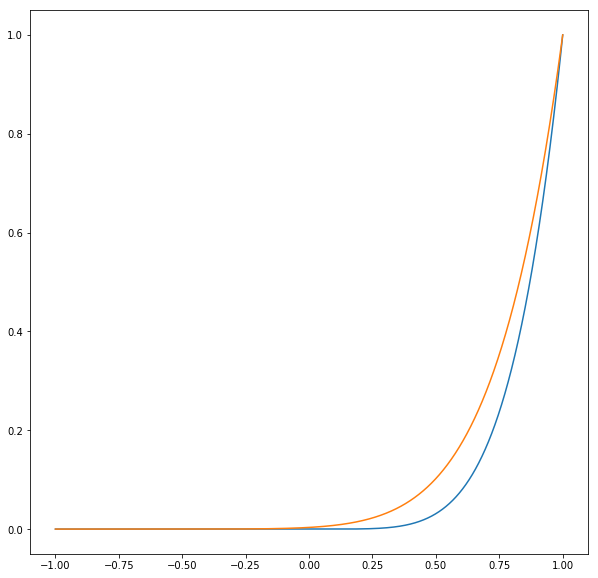

In [216]:
k=10000
n=15
alpha=5
print("for n=%d, alpha=%f we get "%(n,alpha))
exactVSApproximationBern(n,alpha,k)

for n=15, alpha=0.200000 we get 


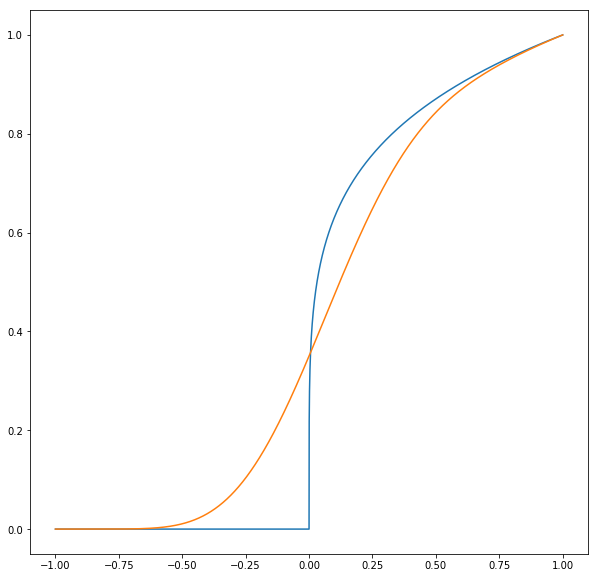

In [217]:
k=10000
n=15
alpha=0.2
print("for n=%d, alpha=%f we get "%(n,alpha))
exactVSApproximationBern(n,alpha,k)

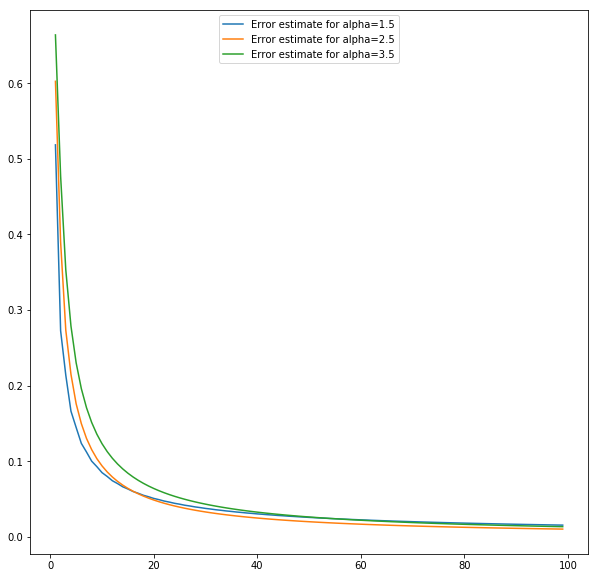

In [236]:
k=500
xList=range(1,100)
yList1=[bernContinuousError(n,k,1.5) for n in range(1,100)]
yList2=[bernContinuousError(n,k,2.5) for n in range(1,100)]
yList3=[bernContinuousError(n,k,3.5) for n in range(1,100)]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.plot(xList,yList1,label='Error estimate for alpha=1.5')
ax1.plot(xList,yList2,label='Error estimate for alpha=2.5')
ax1.plot(xList,yList3,label='Error estimate for alpha=3.5')
ax1.legend(loc="upper center")
plt.show()

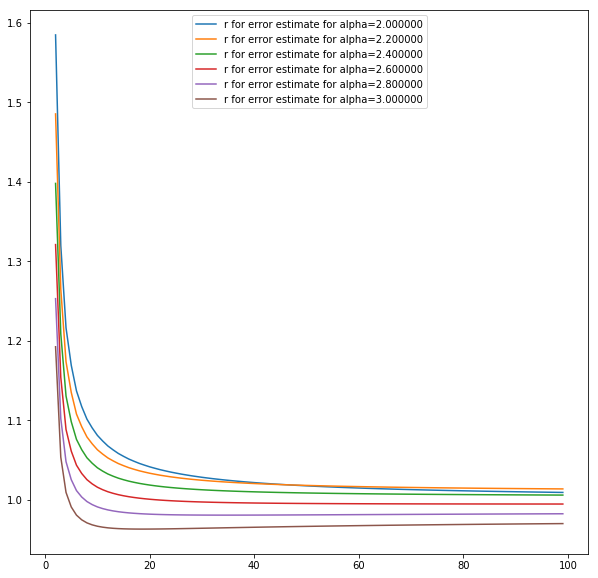

In [234]:
k=1000
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
xList=range(2,100)
for i in range(6):
    alpha=2+i/5
    yList1=[np.log(bernContinuousError(n,k,alpha))/np.log(1/n) for n in range(2,100)]
    ax1.plot(xList,yList1,label='r for error estimate for alpha=%f'%(alpha))
ax1.legend(loc="upper center")
plt.show()

Looking at other values of alpha, it seems that the best one is close to alpha=3. While the convergence of r is linear just like the first case, it's linear for more values. The and their degree is larger than for the uniform approximation. The reason this one behaves differently from the others is that at every point, you consider the images all of the n nodes, so for x<0, even though you can approach it with 0 with the previous approaches, here it's generally not 0.

Question 5:

In [240]:
def exactVSApproximationChebyshev(n,alpha,k):
    nList=[-1+2*i/n for i in range(n+1)]
    xList=np.linspace(-1, 1, k)
    nodes=nodeList(n,alpha)
    exact=[]
    approximate=[]
    for x in xList:
        fun=0
        for j in range(n+1):
            phi=nodes[j]
            if(phi!=0):
                for k in range(n+1):
                    if(j != k):
                        phi=phi*(x-nList[k])/(nList[j]-nList[k])
            fun=fun+phi
        approximate.append(fun)
        if (x<0):
            exact.append(0)
        else:
            exact.append(np.power(x,alpha))
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    ax1.plot(xList,exact,label='Exact value')
    ax1.plot(xList,approximate,label='Approximate value')
    ax1.legend(loc="upper center")
    plt.show()

In [125]:
#Approximating with pointwise continuous functions:
def ChebyshevError(n,k,alpha):
    xList=np.linspace(-1, 1, k)
    nList=[-1+2*i/n for i in range(n+1)]
    nodes=nodeList(n,alpha)
    error=0
    for x in xList:
        fun=0
        for j in range(n+1):
            phi=nodes[j]
            if(phi!=0):
                for k in range(n+1):
                    if(j != k):
                        phi=phi*(x-nList[k])/(nList[j]-nList[k])
            fun=fun+phi
        if (x<0):
            value=np.absolute(fun)
        else:
            value=np.absolute(np.power(x,alpha)-fun)
        if(value>error):
            error=value
    return error

In [111]:
k=10000
print("for alpha=1 and n=15 the error is approximately ",ChebyshevError(10,k,1))
print("for alpha=1 and n=20 the error is approximately ",ChebyshevError(15,k,1))
print("for alpha=2 and n=10 the error is approximately ",ChebyshevError(10,k,2))
print("for alpha=2 and n=15 the error is approximately ",ChebyshevError(15,k,2))
print("for alpha=2 and n=20 the error is approximately ",ChebyshevError(20,k,2))

for alpha=1 and n=15 the error is approximately  0.33177380993
for alpha=1 and n=20 the error is approximately  0.252700314181
for alpha=2 and n=10 the error is approximately  0.00910789156935
for alpha=2 and n=15 the error is approximately  0.243514924246
for alpha=2 and n=20 the error is approximately  0.281535529662


for n=15, alpha=1.5 we get 


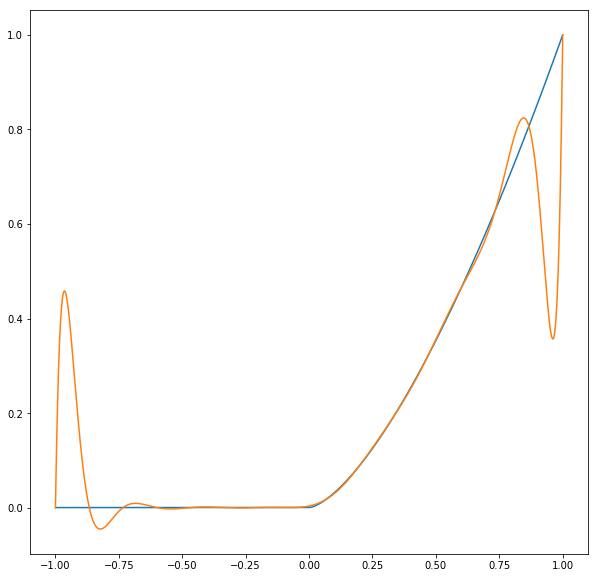

In [117]:
k=10000
print("for n=15, alpha=1.5 we get ")
exactVSApproximationChebyshev(15,1.5,k)

for n=30, alpha=1.5 we get 


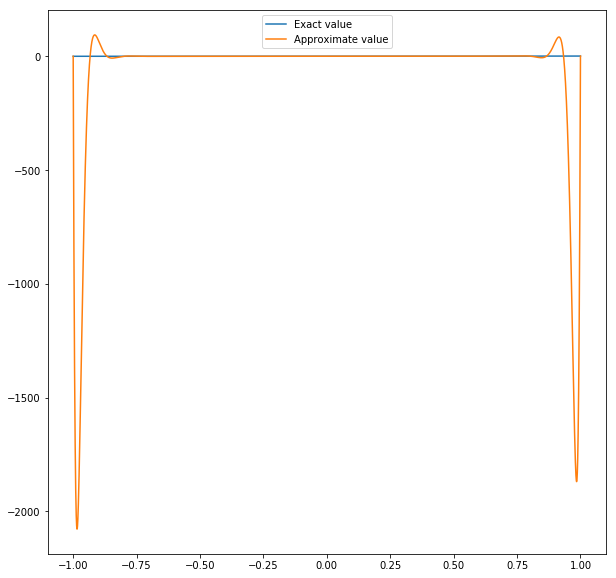

In [241]:
k=10000
print("for n=30, alpha=1.5 we get ")
exactVSApproximationChebyshev(30,1.5,k)

for n=15, alpha=10 we get 


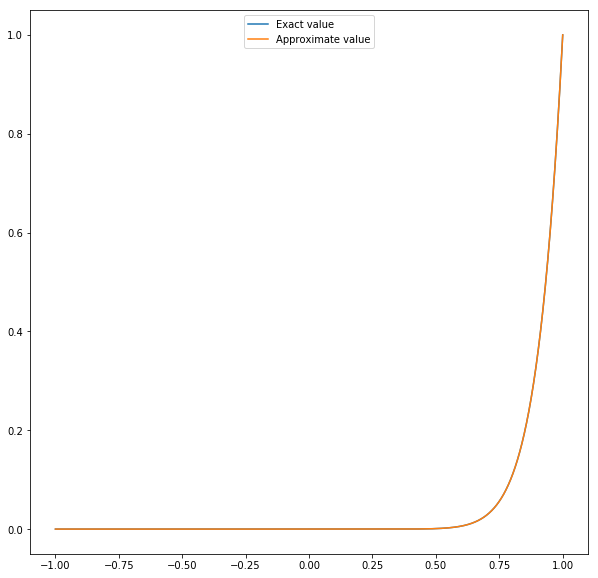

In [243]:
k=10000
print("for n=15, alpha=10 we get ")
exactVSApproximationChebyshev(15,10,k)

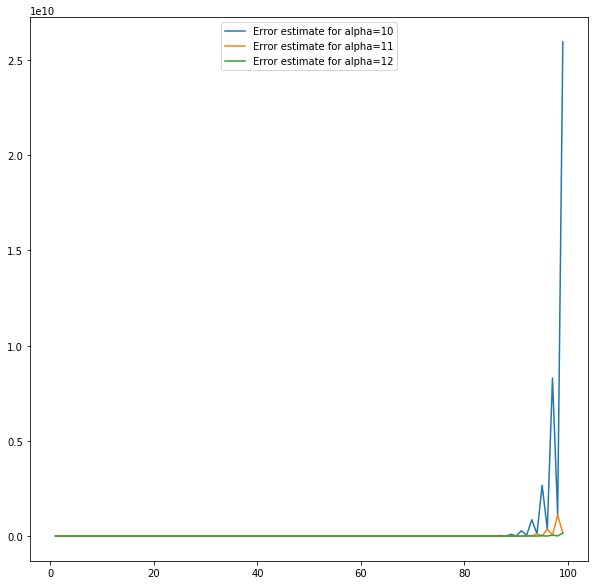

In [244]:
k=500
xList=range(1,100)
yList1=[ChebyshevError(n,k,10) for n in range(1,100)]
yList2=[ChebyshevError(n,k,11) for n in range(1,100)]
yList3=[ChebyshevError(n,k,12) for n in range(1,100)]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.plot(xList,yList1,label='Error estimate for alpha=10')
ax1.plot(xList,yList2,label='Error estimate for alpha=11')
ax1.plot(xList,yList3,label='Error estimate for alpha=12')
ax1.legend(loc="upper center")
plt.show()

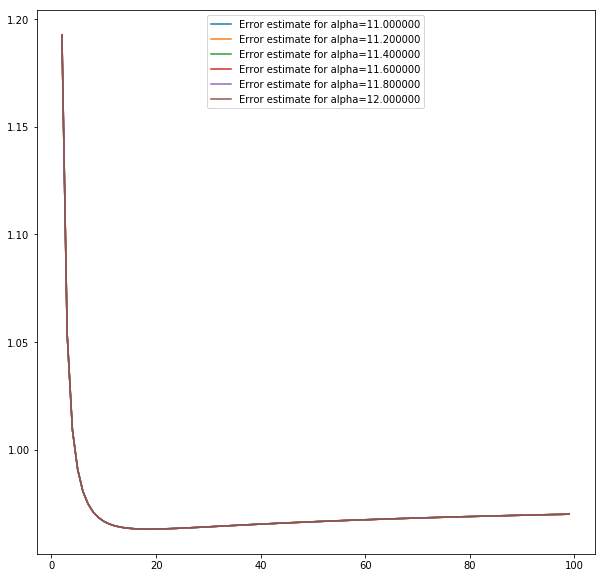

In [235]:
k=1000
xList=range(2,100)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
for i in range (6):
    alpha=11+i/5
    yList=[np.log(ChebyshevError(n,k,alpha))/np.log(1/n) for n in range(2,100)]
    ax1.plot(xList,yList1,label='Error estimate for alpha=%f'%(alpha))
ax1.legend(loc="upper center")
plt.show()

We can get large errors at the boundaries so the convergence is less than linear unlike all the other examples. If we were to use another norm such as a weighted $L_2$ norm with the weight on the values around 0, the error would be  smaller than for the previous approaches. Moreover, when we make alpha larger or smaller, the error can remain very large even after 100 iterations. as we can see, the error for 10 dwarves the error for 11 or 12 which seem to be the optimal values after testing different values of a.